<a href="https://colab.research.google.com/github/JustinhSE/ML-Research/blob/main/spam_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/ML Research'

Mounted at /content/drive
/content/drive/My Drive/ML Research


logisitic regression

In [ ]:
import pandas as pd

In [5]:
df = pd.read_csv('research.csv')

In [ ]:
X = df['v2']
y = df['v1']  # Assuming 'target' is the name of the first column (0 or 1)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_transformed = vectorizer.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.98      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



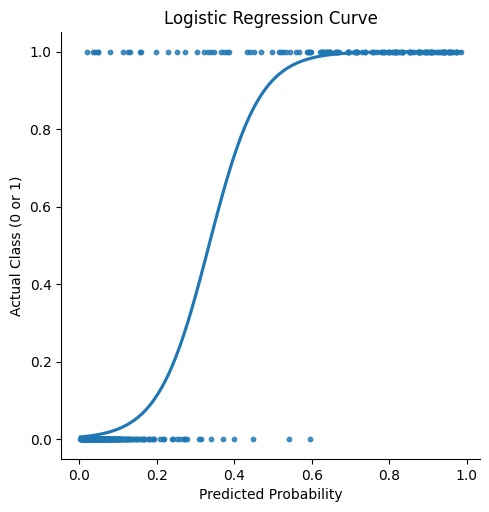

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a trained model 'model' and test data 'X_test'
probas = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Create a dataframe with predicted probabilities and actual classes
results_df = pd.DataFrame({'Predicted_Probability': probas, 'Actual_Class': y_test})

# Plot the logistic regression curve
sns.lmplot(x='Predicted_Probability', y='Actual_Class', data=results_df, logistic=True, ci=None, scatter_kws={'s': 10})
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Class (0 or 1)')
plt.title('Logistic Regression Curve')
plt.show()


---

naive bayes

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.98      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



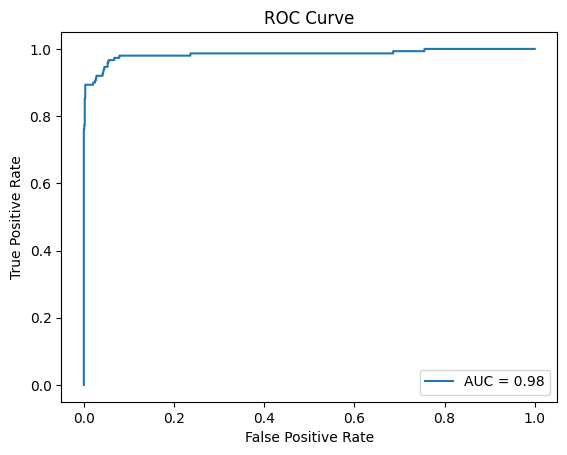

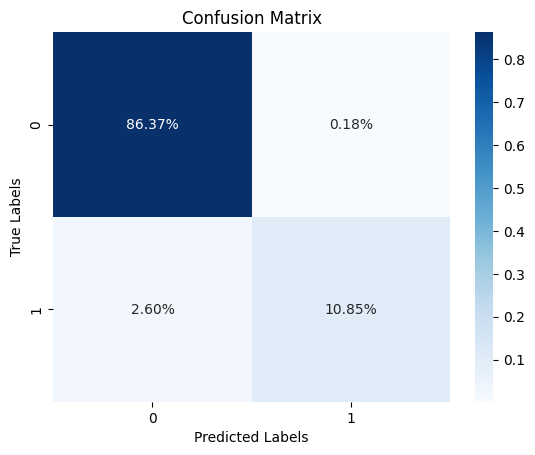

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from wordcloud import WordCloud

# Load the data from 'research.csv'
df = pd.read_csv('research.csv')

# Split variables into X (text messages) and y (target labels)
X = df['v2']  # Adjust column name if needed
y = df['v1']  # 0 for legit, 1 for spam

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Transform text data into numerical features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))


# ROC Curve
y_pred_proba = nb_classifier.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Confusion Matrix Heatmap
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Word Embeddings and KNN

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.98      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


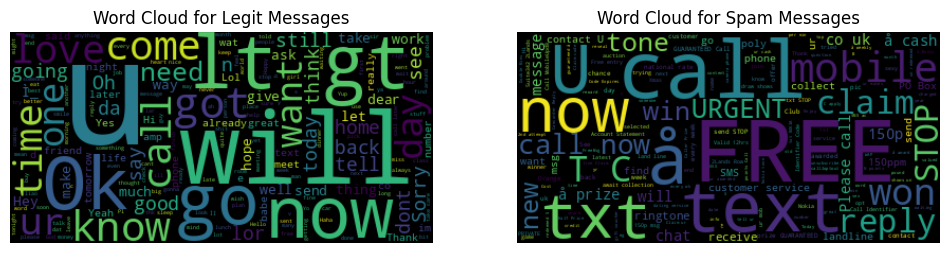

In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the data from 'research.csv'
df = pd.read_csv('research.csv')

# Split variables into X (text messages) and y (target labels)
X = df['v2']  # Adjust column name if needed
y = df['v1']  # 0 for legit, 1 for spam

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Word embeddings
word2vec_model = Word2Vec(sentences=X, vector_size=100, window=5, min_count=1, sg=1)

# K-Means clustering for legit (0) and spam (1) separately
kmeans_legit = KMeans(n_clusters=3, random_state=42)
kmeans_spam = KMeans(n_clusters=3, random_state=42)

# Fit K-Means on legit and spam text messages
kmeans_legit.fit(word2vec_model.wv.vectors)
kmeans_spam.fit(word2vec_model.wv.vectors)

# Word cloud for legit and spam themes
wordcloud_legit = WordCloud().generate(' '.join(X[y == 0]))
wordcloud_spam = WordCloud().generate(' '.join(X[y == 1]))

# Visualize word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_legit, interpolation='bilinear')
plt.title('Word Cloud for Legit Messages')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis("off")

plt.show()

# You can explore the K-Means clusters and themes further


Topic 1: later, for, sorry, you, the, your, gt, lt, call, to
Topic 2: good, your, in, my, to, and, how, the, are, you
Topic 3: da, so, ur, go, to, wat, ì_, then, lor, ok
Topic 4: is, and, me, be, the, that, it, in, to, you
Topic 5: pa, on, home, to, now, lunch, ur, free, dear, call
Topic 1: that, of, for, my, in, it, and, is, the, to
Topic 2: know, where, have, when, me, what, do, how, are, you
Topic 3: free, me, in, please, now, meeting, sorry, ll, later, call
Topic 4: yup, wat, it, thanx, go, ì_, ur, then, lor, ok
Topic 5: rs, its, for, like, min, in, at, decimal, lt, gt


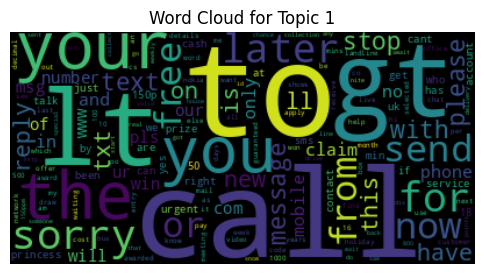

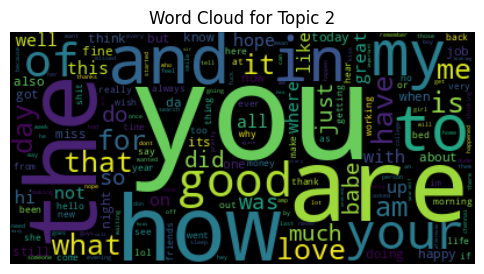

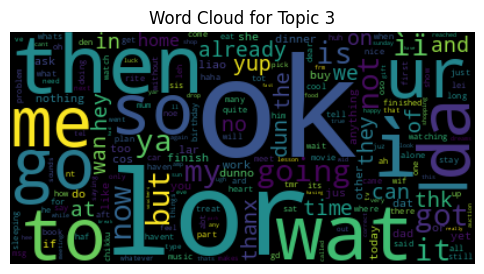

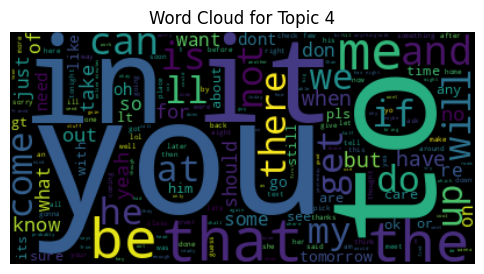

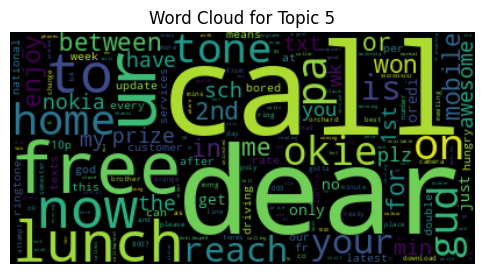

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud

# Load the data from 'research.csv'
df = pd.read_csv('research.csv')

# Split variables into X (text messages) and y (target labels)
X = df['v2']  # Adjust column name if needed
y = df['v1']  # 0 for legit, 1 for spam

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_tfidf = vectorizer.fit_transform(X)

# Perform Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_tfidf)

# Get the top words for each topic
feature_names = vectorizer.get_feature_names_out()
n_top_words = 10
for topic_idx, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[-n_top_words:]
    top_features = feature_names[top_features_ind]
    print(f"Topic {topic_idx + 1}: {', '.join(top_features)}")

# Perform Non-Negative Matrix Factorization (NMF)
nmf = NMF(n_components=5, random_state=42)
nmf.fit(X_tfidf)

# Get the top words for each topic
for topic_idx, topic in enumerate(nmf.components_):
    top_features_ind = topic.argsort()[-n_top_words:]
    top_features = feature_names[top_features_ind]
    print(f"Topic {topic_idx + 1}: {', '.join(top_features)}")

# Word cloud for each topic
for topic_idx, topic in enumerate(lda.components_):
    wordcloud = WordCloud().generate_from_frequencies(dict(zip(feature_names, topic)))
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Topic {topic_idx + 1}")
    plt.axis("off")
    plt.show()


most common phrases


In [28]:
import pandas as pd
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# import spacy
# # Load the English language model
# nlp = spacy.load("en_core_web_sm")


def preprocess_text(text):
    # doc = nlp(text)
    # # Remove special characters, punctuation, and numbers
    # cleaned_tokens = [token.text.lower() for token in doc if token.is_alpha]
    # # Remove stop words
    # stop_words = set(stopwords.words("english"))
    # filtered_tokens = [word for word in cleaned_tokens if word not in stop_words and len(word) > 1]

    # return " ".join(filtered_tokens)

    # Remove special characters, punctuation, and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    return " ".join(filtered_tokens)



# Load the data from 'research.csv'
df = pd.read_csv('research.csv')

# Assuming you've already defined the preprocess_text function
df["cleaned_text"] = df["v2"].apply(preprocess_text)


# Filter legit and spam messages
legit_messages = df[df['v1'] == 0]['v2']
spam_messages = df[df['v1'] == 1]['v2']

# Tokenize and count phrases
def get_phrases(messages, n=2):
    phrases = []
    for message in messages:
        tokens = word_tokenize(message.lower())  # Tokenize and lowercase
        ngram_tokens = ngrams(tokens, n)
        phrases.extend([' '.join(gram) for gram in ngram_tokens])
    return phrases

# Get most common phrases (change n as needed)
n = 2  # Change to 3 for trigrams, etc.
legit_phrases = get_phrases(legit_messages, n)
spam_phrases = get_phrases(spam_messages, n)

# Find most common phrases
top_legit_phrases = Counter(legit_phrases).most_common(10)
top_spam_phrases = Counter(spam_phrases).most_common(10)

print("Top Legit Phrases:")
for phrase, count in top_legit_phrases:
    print(f"{phrase}: {count}")

print("\nTop Spam Phrases:")
for phrase, count in top_spam_phrases:
    print(f"{phrase}: {count}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top Legit Phrases:
i 'm: 384
. i: 362
& lt: 314
lt ;: 314
& gt: 314
gt ;: 314
# &: 280
; #: 276
: ): 251
, i: 233

Top Spam Phrases:
. call: 88
now !: 81
you have: 73
* *: 61
have won: 54
t &: 51
your mobile: 49
to claim: 46
urgent !: 45
please call: 45
